## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [2]:
# Choose a cutoff value and create a list of application types to be replaced
# Assign values counts to a variable to create bins. 
application_counts = application_df['APPLICATION_TYPE'].value_counts()
# gather all the application types that will be binned into "Other"
application_types_to_replace = list(application_counts[application_counts<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = list(classification_counts[classification_counts<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")


In [3]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummy_df = pd.get_dummies(application_df)

In [4]:
# Split our preprocessed data into our features and target arrays
X = application_dummy_df.drop("IS_SUCCESSFUL", axis=1).values
y = application_dummy_df["IS_SUCCESSFUL"].values

#split test and train data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Compile, Train and Evaluate the Model

In [5]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=43))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=43))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model - Adding a validation split to see if it will improve the model. 
fit_model = nn.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/80
858/858 [==============================] - 2s 1ms/step - loss: 0.5684 - accuracy: 0.7209
Epoch 2/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5534 - accuracy: 0.7306
Epoch 3/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7317
Epoch 4/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5492 - accuracy: 0.7316
Epoch 5/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5480 - accuracy: 0.7314
Epoch 6/80
858/858 [==============================] - 1s 986us/step - loss: 0.5471 - accuracy: 0.7312
Epoch 7/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5461 - accuracy: 0.7334
Epoch 8/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5456 - accuracy: 0.7338
Epoch 9/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5454 - accuracy: 0.7344
Epoch 10/80
858/858 [==============================] - 1s 985us/step - loss: 0.5448 - accuracy: 0.

In [7]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5647 - accuracy: 0.7248 - 289ms/epoch - 1ms/step
Loss: 0.5646963119506836, Accuracy: 0.724781334400177


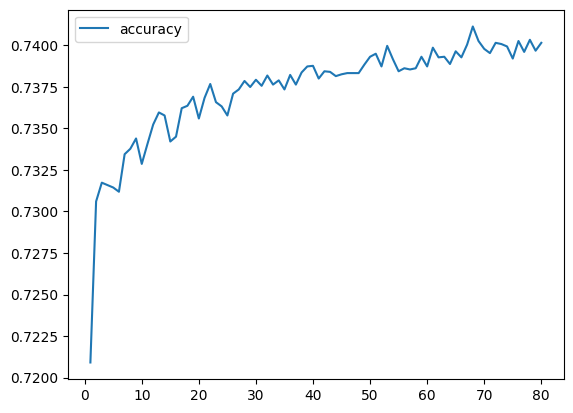

In [8]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy");

Second Attempt I shuffled the test data and added an additional hidden keras layer.  This did not improve the model. Next I will attemp to add the Name of the organization back to see if that additional feature will improve the model. 